In [96]:
import random
from pathlib import Path
from typing import List
from IPython.display import display, Image

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

# Exercise 1:

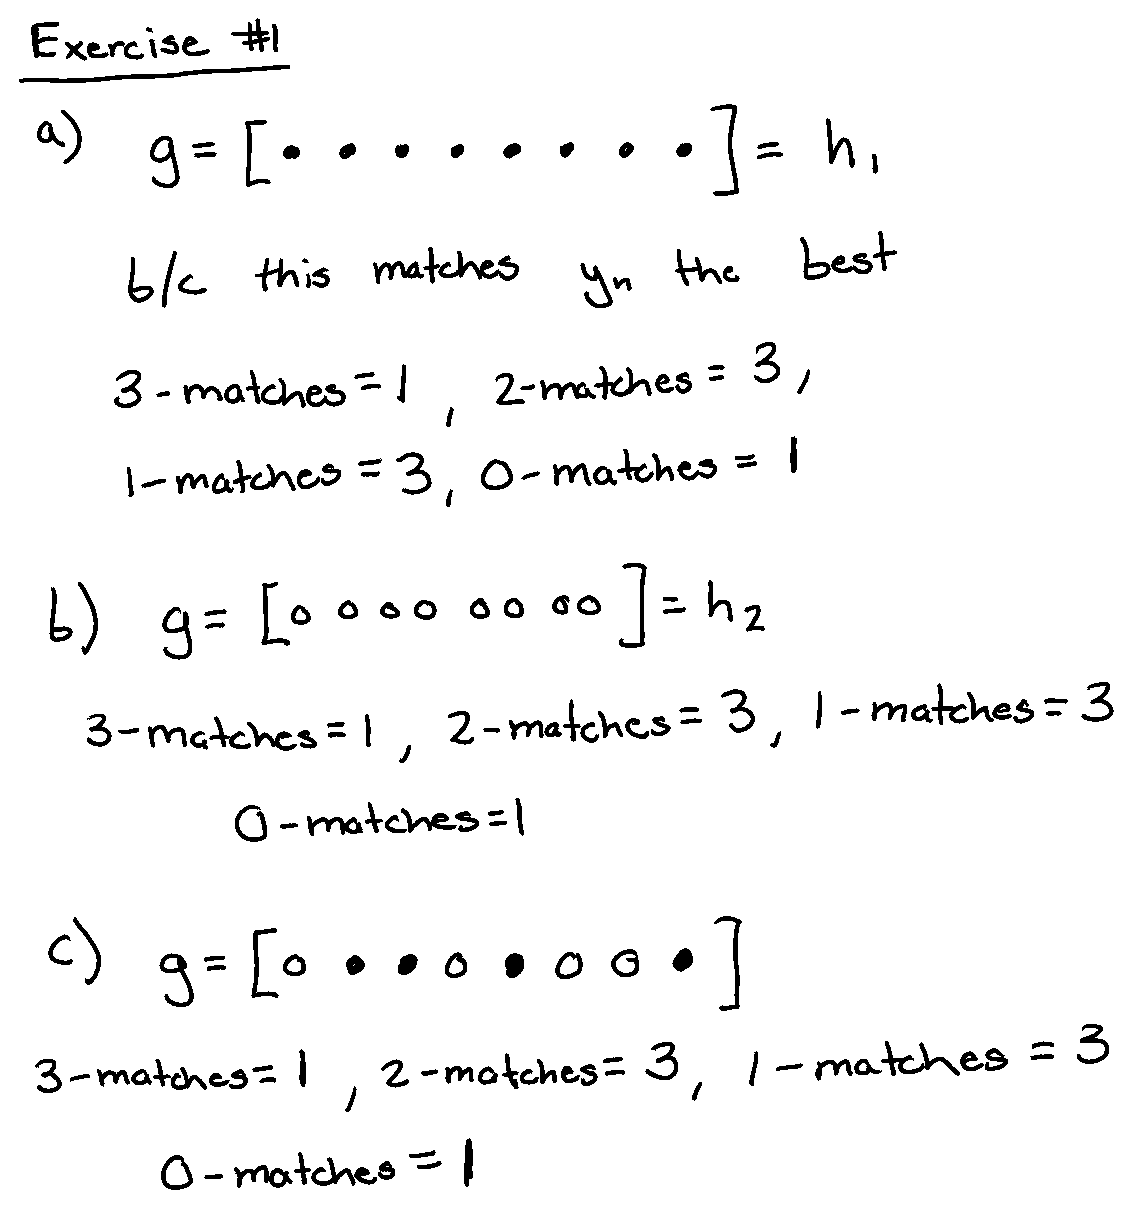

In [97]:
display(Image(filename="./images/hw6_p1.png", height=400, width=500))

# Exercise 2:

### Problem 2a:
Since the coins are independent and fair coins, 

$$\mu_1 = \mu_{rand} = \mu_{min} = 0.5$$

### Problem 2b:

In [98]:
def run_experiment():
    # Heads == 1, Tails == 0
    n_coins = 1000
    num_flips = 10
    vals = np.random.choice([0, 1], size=(n_coins, num_flips), p=[.5, .5])
    sums = vals.sum(axis=1)
    v_1 = sums[0] / num_flips
    v_rand = sums[random.randint(0, n_coins-1)] / num_flips
    v_min = min(sums) / num_flips
    return (v_1, v_rand, v_min)

num_experiments = 100_000
v_1s = []
v_rands = []
v_mins = []
for i in range(num_experiments):
    v_1, v_rand, v_min = run_experiment()
    v_1s.append(v_1)
    v_rands.append(v_rand)
    v_mins.append(v_min)

Text(0, 0.5, 'Occurances')

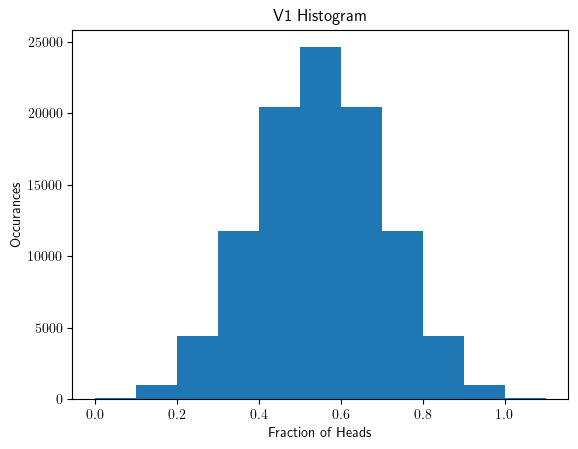

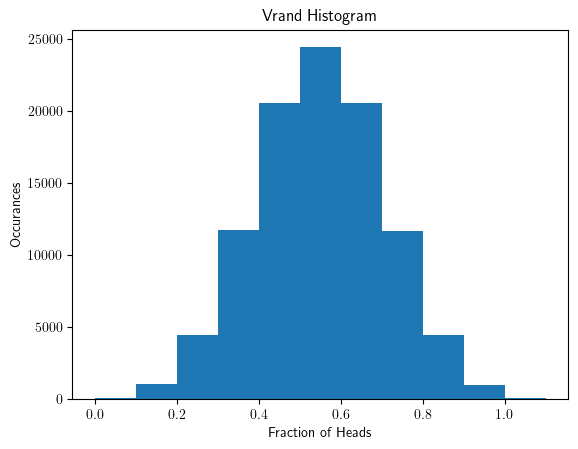

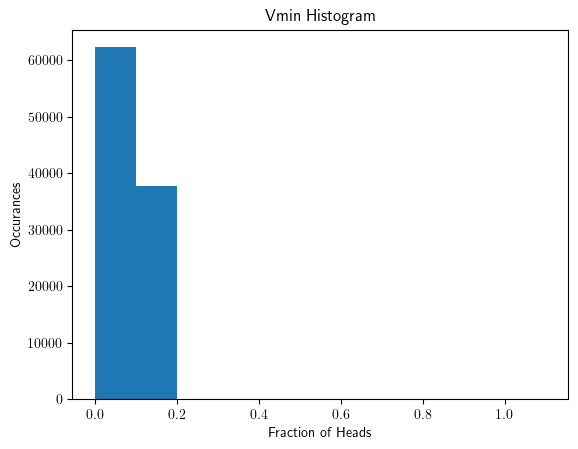

In [99]:
# Generate Histogram Plots
bins_sequence = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
bins_sequence = [val / 10 for val in bins_sequence]

fig = plt.figure()
plt.hist(v_1s, bins=bins_sequence)
plt.title("V1 Histogram")
plt.xlabel("Fraction of Heads")
plt.ylabel("Occurances")

fig = plt.figure()
plt.hist(v_rands, bins=bins_sequence)
plt.title("Vrand Histogram")
plt.xlabel("Fraction of Heads")
plt.ylabel("Occurances")

fig = plt.figure()
plt.hist(v_mins, bins=bins_sequence)
plt.title("Vmin Histogram")
plt.xlabel("Fraction of Heads")
plt.ylabel("Occurances")

### Problem 2c:

Text(0.5, 0, '$\\epsilon$')

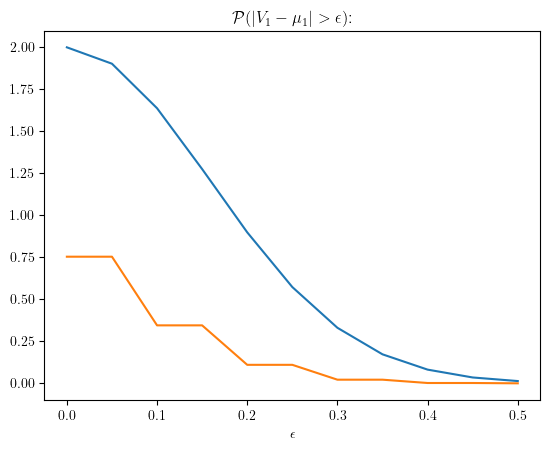

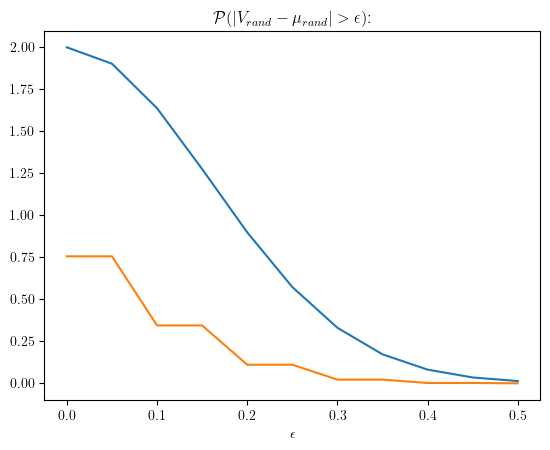

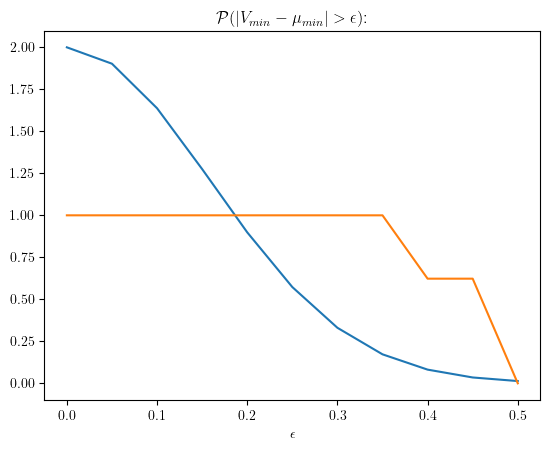

In [102]:
def hoeffding_bound(epsilon: np.array, N):
    return 2 * np.exp(-2 * np.square(epsilon) * N)
epsilon = np.linspace(0.0, 0.5, int((0.5 - 0.0) / 0.05) + 1)
hoeffding = hoeffding_bound(epsilon, 10)

mu = 0.5
v1_delta = np.abs(np.array(v_1s) - mu)
p_v_1 = [np.count_nonzero(v1_delta > eps) / num_experiments for eps in epsilon]
fig = plt.figure()
plt.plot(epsilon, hoeffding)
plt.plot(epsilon, p_v_1)
plt.title(r"$\mathcal{P}(|V_1 - \mu_1| > \epsilon)$:")
plt.xlabel(r"$\epsilon$")

vrand_delta = np.abs(np.array(v_rands) - mu)
p_v_rand = [np.count_nonzero(vrand_delta > eps) / num_experiments for eps in epsilon]
fig = plt.figure()
plt.plot(epsilon, hoeffding)
plt.plot(epsilon, p_v_rand)
plt.title(r"$\mathcal{P}(|V_{rand} - \mu_{rand}| > \epsilon)$:")
plt.xlabel(r"$\epsilon$")

vmin_delta = np.abs(np.array(v_mins) - mu)
p_v_min = [np.count_nonzero(vmin_delta > eps) / num_experiments for eps in epsilon]
fig = plt.figure()
plt.plot(epsilon, hoeffding)
plt.plot(epsilon, p_v_min)
plt.title(r"$\mathcal{P}(|V_{min} - \mu_{min}| > \epsilon)$:")
plt.xlabel(r"$\epsilon$")


### Problem 2d:
Coins $V_1$ and $V_{min}$ obey Hoeffding's bound; however, $V_{min}$ does not. This is because we are NOT allowed to consider the input/training data when applying the inequality, let alone manipulate it. When we always choose the minimum coin, we are manipulating the underlying distribution of $V_{min}$ which voids Hoeffding's bound.